In [19]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import json
import os

from datetime import datetime, timedelta
from os import path
from scipy.fftpack import fft, ifft
from matplotlib import gridspec
from matplotlib import pyplot as plt

In [5]:
station_df = pd.read_csv('../data/station_info.csv')
station_timeseries_df = pd.read_csv('../data/stations_timeseries.csv')

In [17]:
woolsey_names = [n for n in station_df.name if n.startswith("Woolsey")]
ashby_names = [n for n in station_df.name if n.startswith("Ash")]
hearst_names = [n for n in station_df.name if n.startswith("Hearst Ave at Euclid Ave")]
#print([n for n in station_df.name if "Woolsey" in n])
east_bay_barts = ['Fruitvale BART Station', 'Rockridge BART Station',
                  'Downtown Berkeley BART', 'North Berkeley BART Station',
                  '19th Street BART Station', 'West Oakland BART Station', "MacArthur BART Station"]
east_bay_res = ['Alcatraz Ave at Shattuck Ave', "Bushrod Park", 'Woolsey St at Sacramento St', 
                'Fulton St at Ashby Ave', "Dover St at 57th St", "Shattuck Ave at Telegraph Ave", 
                "Broadway at 40th St", "45th St at Manila", "Mosswood Park"]


ashby_id = station_df[station_df.name.isin(ashby_names)].station_id.values[0]
woolsey_id = station_df[station_df.name.isin(woolsey_names)].station_id.values[0]
hearst_id = station_df[station_df.name.isin(hearst_names)].station_id.values[0]
bart_ids = station_df[station_df.name.isin(east_bay_barts)].station_id.values
residential_ids = station_df[station_df.name.isin(east_bay_res)].station_id.values

In [31]:
def week_station_occupancy_plot(dataset_df, station_id, start_datetime):
    mask = dataset_df.station_id == station_id
    masked_df = dataset_df[mask]

    start_dt = start_datetime
    end_dt = start_datetime + timedelta(days=7)
    
    dtimes = [datetime.fromtimestamp(ts/1000) for ts in masked_df.query_ts]
    time_mask = [dt > start_dt and dt < end_dt for dt in dtimes]
    
    window2use = masked_df[time_mask]
    query_hrs = window2use.query_ts/(1000*60*60)
    query_hrs -= query_hrs.min()
    
    # Capacity of the station
    station_capacity = station_df[station_df.station_id == station_id].capacity.values[0]
    
    # Plot the number of bikes, docks and disabled bikes this station over 1 week.
    # These numbers should always sum to the total number of docks at the station, or so we hope.
    pal = sns.color_palette('muted')

    base = 0 
    plt.fill_between(query_hrs, base, window2use.num_bikes_available, color=pal[0])
    base += window2use.num_bikes_available
    plt.fill_between(query_hrs, base, base + window2use.num_docks_available, color=pal[1])
    base += window2use.num_docks_available
    plt.fill_between(query_hrs, base, base + window2use.num_bikes_disabled, color='grey')

    # Assumes starting time is 8am, so we are marking 8am and 6pm on the graph as a
    # rough proxy for the workday
    for pos in np.arange(0, 160, 24):
        plt.axvline(pos, color='k', lw=1.5, ls='--', alpha=0.7)
        plt.axvspan(pos, pos+10, color='y', alpha=0.2)
        plt.axvspan(pos+10, pos+24, color='k', alpha=0.2)

    plt.yticks(np.arange(0, 23, 5)[1:], fontsize=16)
    # Assume's first day is Sunday
    days = 'Sun,Mon,Tues,Weds,Thurs,Fri,Sat,Sun'.split(',')
    plt.xticks(np.arange(0, 169, 24), days, fontsize=18, ha='center')
    plt.ylim(0, station_capacity)
    plt.xlim(0, 168)
    

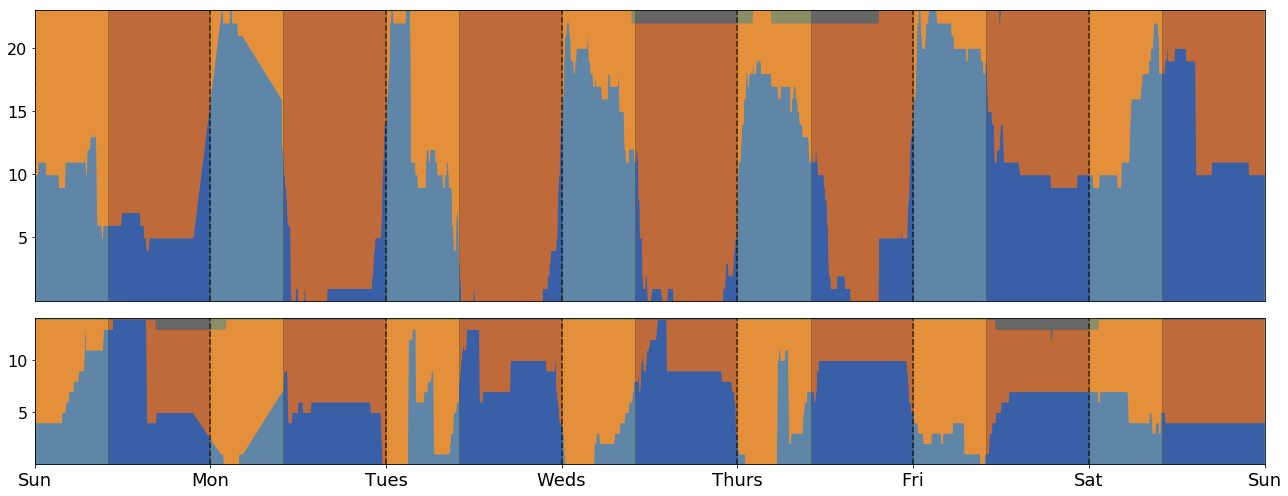

In [33]:
start_dt = datetime(2019, 8, 18, 8)
plt.figure(figsize=(18,7))
G = gridspec.GridSpec(2, 1, height_ratios=[2,1])
plt.subplot(G[0, 0])
week_station_occupancy_plot(station_timeseries_df, ashby_id, start_dt)
plt.xticks([])

plt.subplot(G[1, 0])
week_station_occupancy_plot(station_timeseries_df, woolsey_id, start_dt)
plt.tight_layout()
plt.savefig('fig1.png', dpi=300)
plt.show()

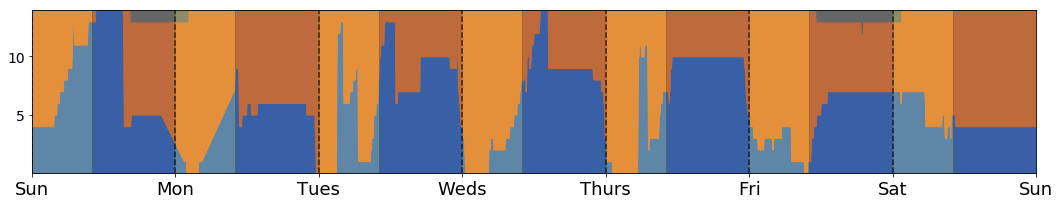

In [9]:
start_dt = datetime(2019, 8, 18, 8)
plt.figure(figsize=(18,3))
week_station_occupancy_plot(station_timeseries_df, woolsey_id, start_dt)
plt.show()

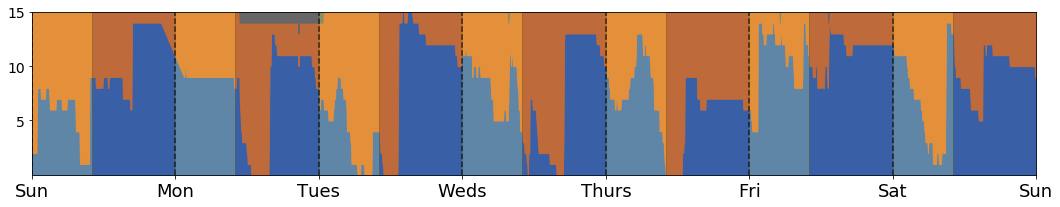

In [10]:
start_dt = datetime(2019, 8, 18, 8)
plt.figure(figsize=(18,3))
week_station_occupancy_plot(station_timeseries_df, hearst_id, start_dt)
plt.show()

West Oakland BART Station


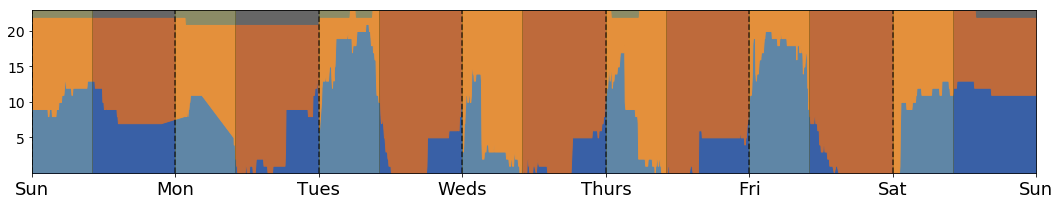

Rockridge BART Station


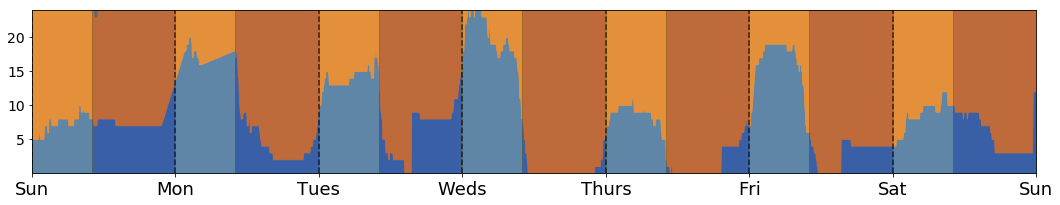

MacArthur BART Station


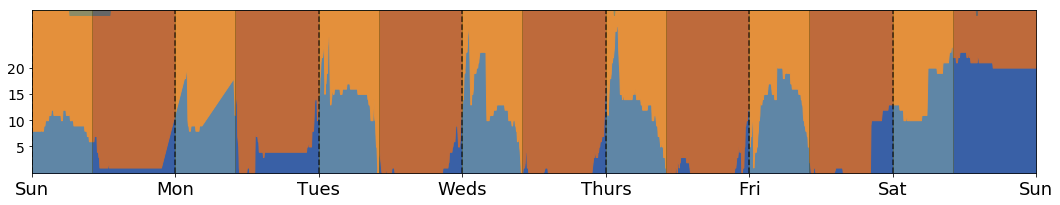

19th Street BART Station


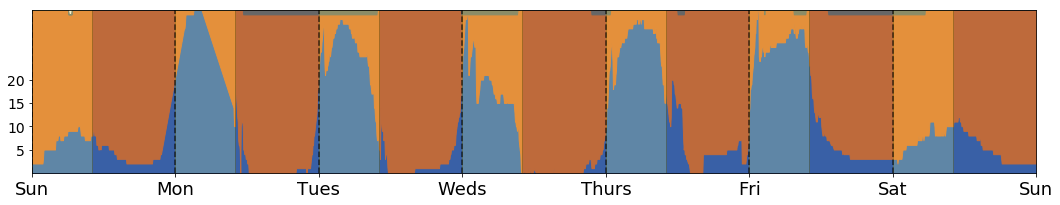

Fruitvale BART Station


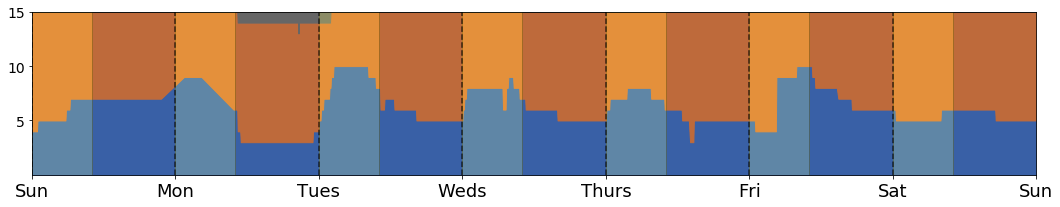

Downtown Berkeley BART


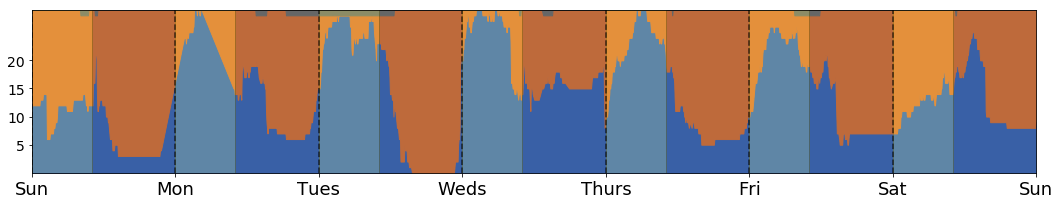

North Berkeley BART Station


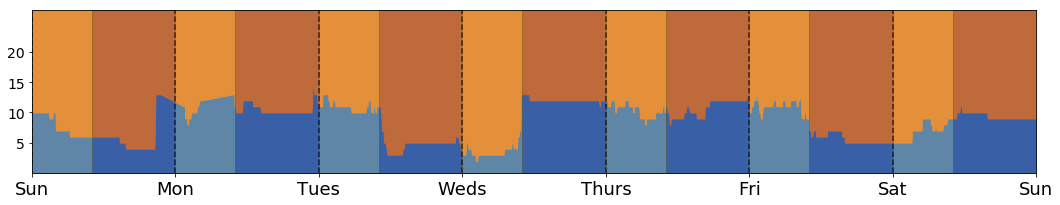

In [11]:
start_dt = datetime(2019, 8, 18, 8)
for sid in bart_ids:
    station_name = station_df[station_df.station_id == sid].name.values[0]
    print(station_name)
    plt.figure(figsize=(18,3))
    week_station_occupancy_plot(station_timeseries_df, sid, start_dt)
    plt.show()

Shattuck Ave at Telegraph Ave


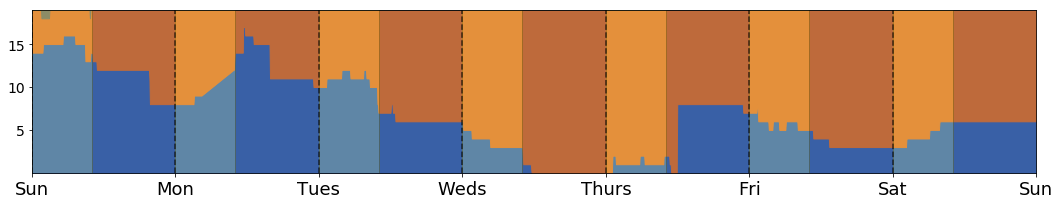

Alcatraz Ave at Shattuck Ave


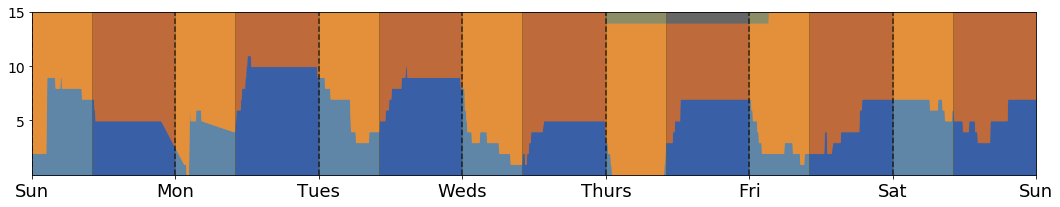

Bushrod Park


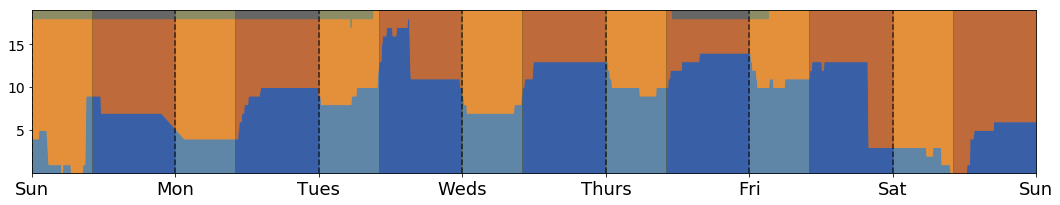

Dover St at 57th St


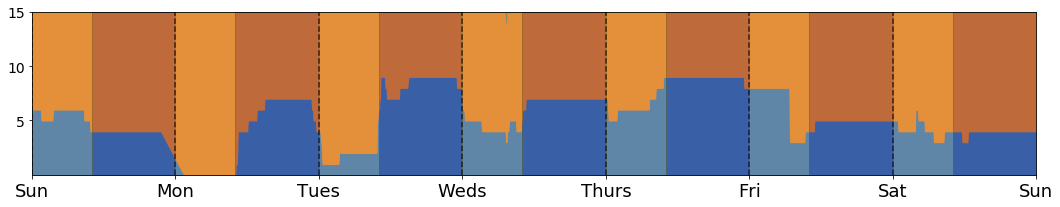

45th St at Manila


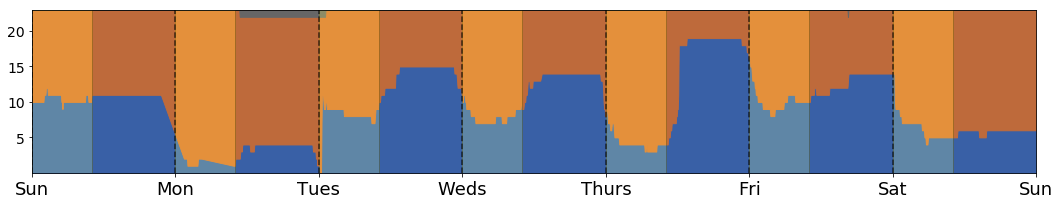

Broadway at 40th St


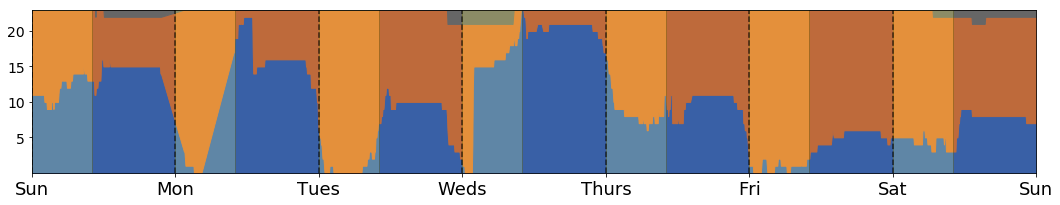

Mosswood Park


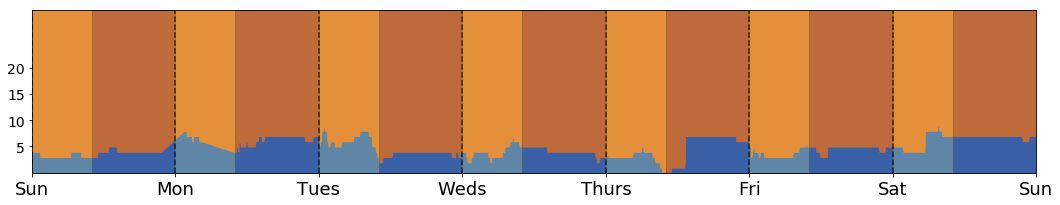

Fulton St at Ashby Ave


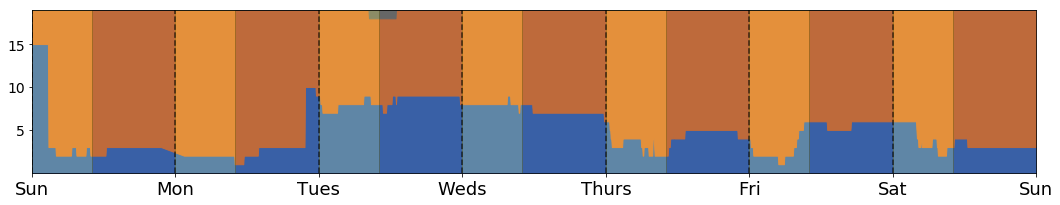

Woolsey St at Sacramento St


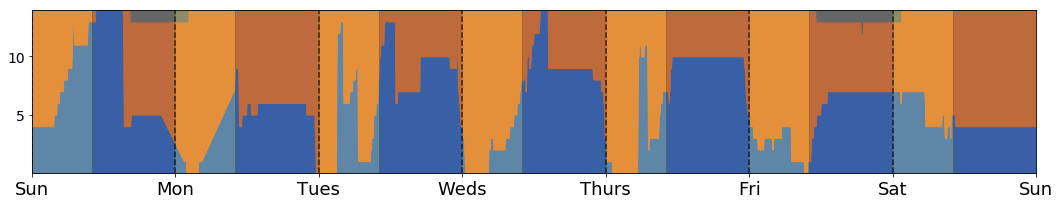

In [18]:
start_dt = datetime(2019, 8, 18, 8)
for sid in residential_ids:
    station_name = station_df[station_df.station_id == sid].name.values[0]
    print(station_name)
    plt.figure(figsize=(18,3))
    week_station_occupancy_plot(station_timeseries_df, sid, start_dt)
    plt.show()